In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv(r'C:\Users\user\Downloads\dataset.csv', sep = ';', decimal = ',', skiprows=[1])
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666666666666666,0,13.9,-0.3,0.79,Graduate
1,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.0,0,10.8,1.4,1.74,Dropout
2,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.4,0,9.4,-0.8,-3.12,Graduate
3,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.0,0,13.9,-0.3,0.79,Graduate
4,2,12,1,17,0,12,1,22,27,10,...,0,5,17,5,11.5,5,16.2,0.3,-0.92,Graduate


In [3]:
#Xem hình dạng của dataframe
df.shape

(4423, 35)

In [4]:
df.drop_duplicates(keep='first', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4423 entries, 0 to 4422
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Marital status                                  4423 non-null   int64 
 1   Application mode                                4423 non-null   int64 
 2   Application order                               4423 non-null   int64 
 3   Course                                          4423 non-null   int64 
 4   Daytime/evening attendance                      4423 non-null   int64 
 5   Previous qualification                          4423 non-null   int64 
 6   Nacionality                                     4423 non-null   int64 
 7   Mother's qualification                          4423 non-null   int64 
 8   Father's qualification                          4423 non-null   int64 
 9   Mother's occupation                             4423

In [5]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis = 1, keys = ['Total', '%'])
missing_data.head(20)

,Total,%
Marital status,0,0.0
Curricular units 2nd sem (enrolled),0,0.0
Curricular units 1st sem (enrolled),0,0.0
Curricular units 1st sem (evaluations),0,0.0
Curricular units 1st sem (approved),0,0.0
Curricular units 1st sem (grade),0,0.0
Curricular units 1st sem (without evaluations),0,0.0
Curricular units 2nd sem (credited),0,0.0
Curricular units 2nd sem (evaluations),0,0.0
International,0,0.0


C:\Users\user\AppData\Local\Temp\ipykernel_16480\1314832757.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='pearson'), annot=True);


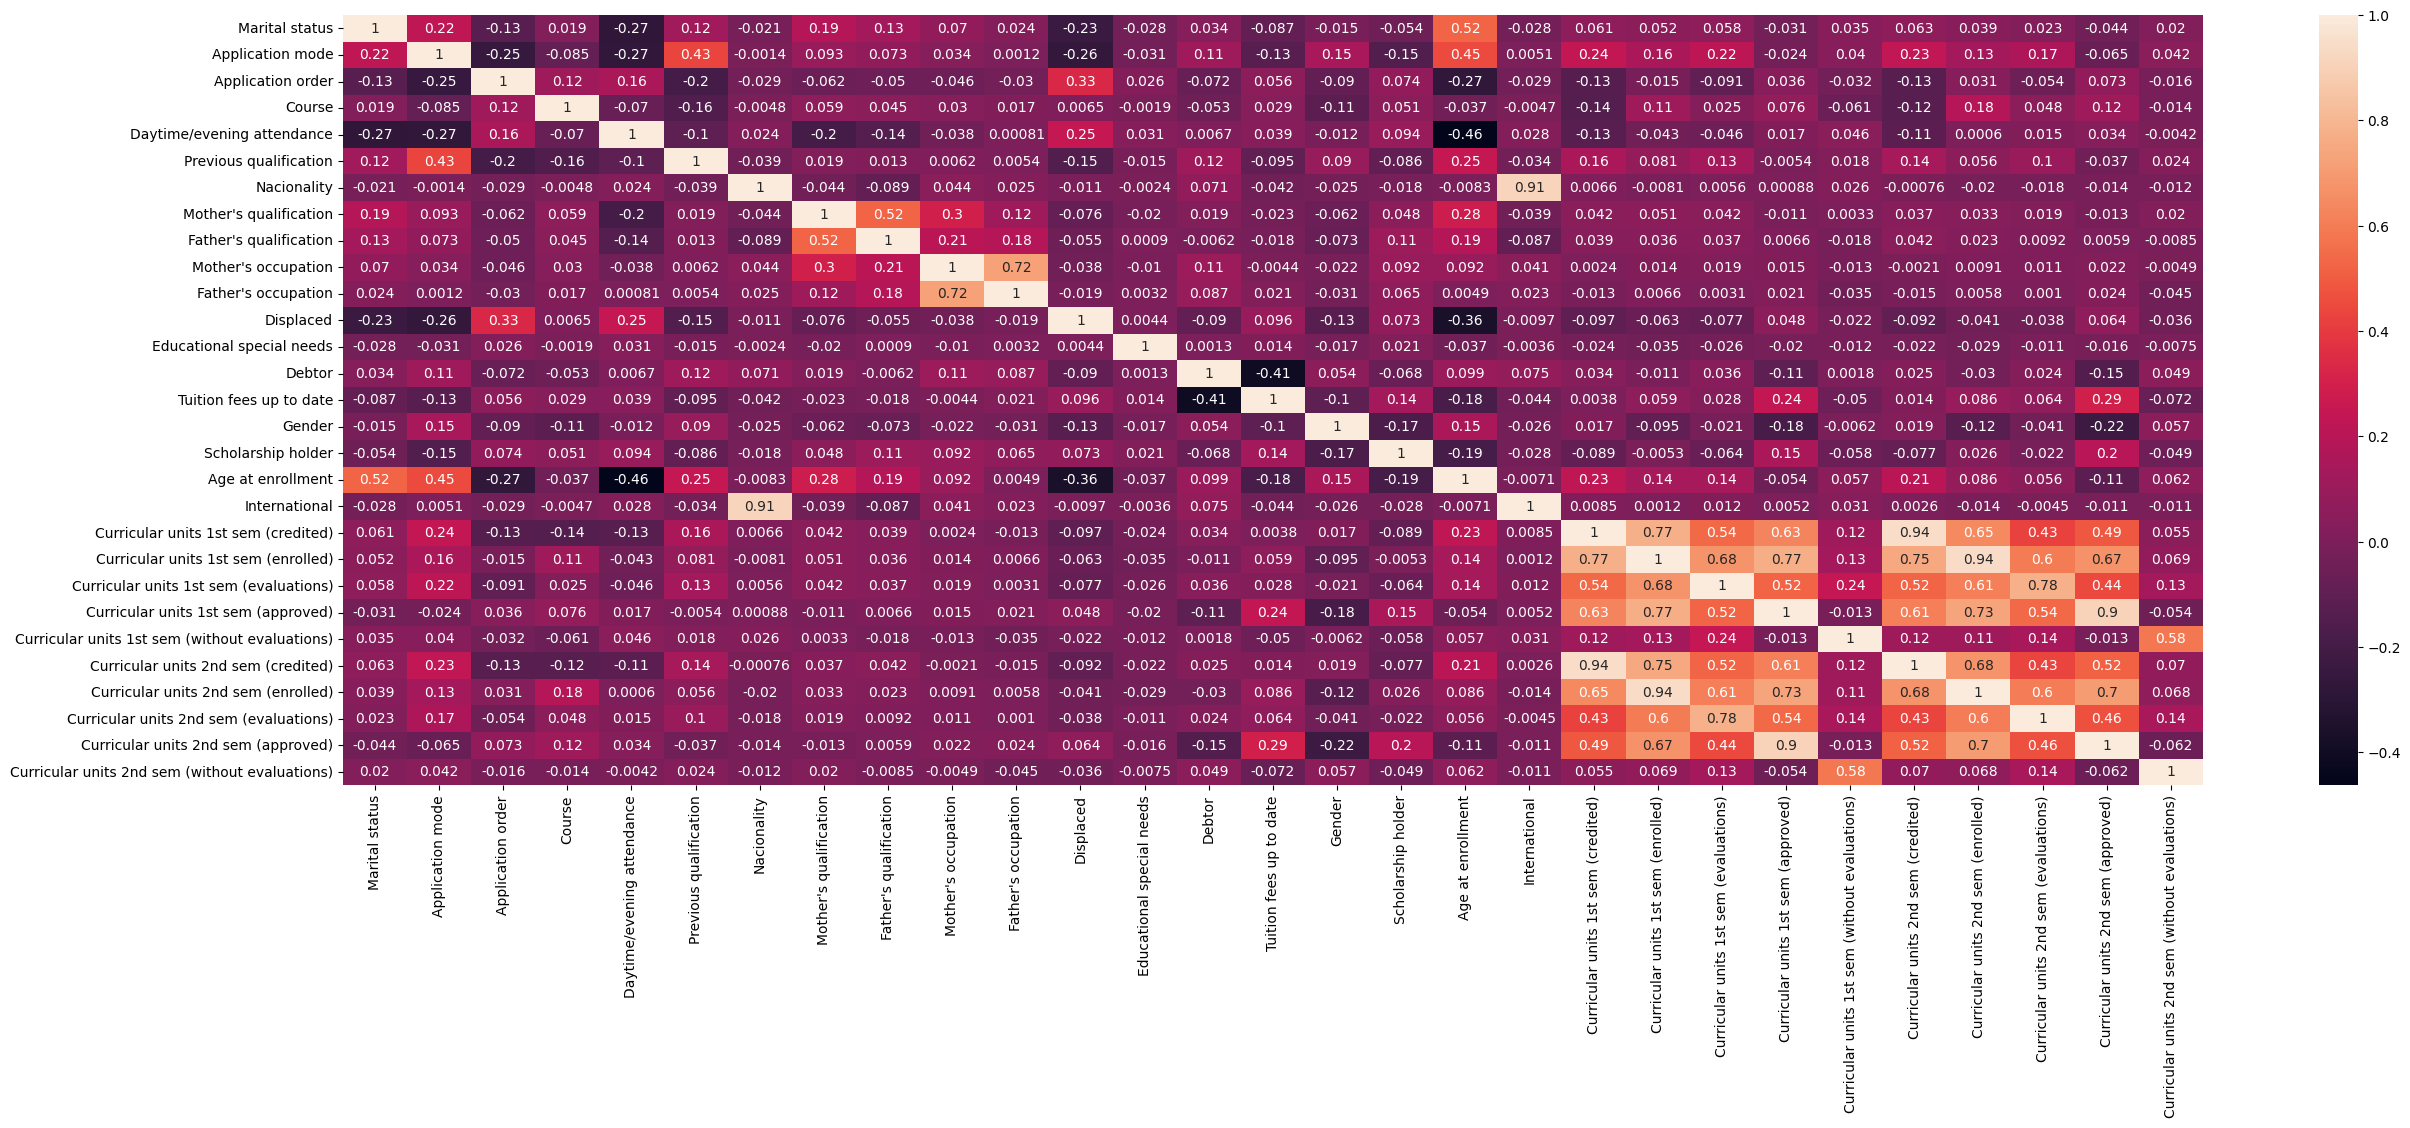

In [6]:
plt.figure(figsize=(30,10))
sns.heatmap(df.corr(method='pearson'), annot=True);

In [7]:
df = df.drop(['Nacionality','Curricular units 2nd sem (credited)','Curricular units 2nd sem (enrolled)',
              'Curricular units 2nd sem (approved)'], axis = 1)

In [8]:
df['Target'].unique()

array(['Graduate', 'Dropout', 'Enrolled'], dtype=object)

In [9]:
Target = {'Graduate':0, 'Dropout':1, 'Enrolled':0}
for dataset in [df]:
    dataset['Target'] = dataset['Target'].map(Target)
    
df['Target']


0       0
1       1
2       0
3       0
4       0
       ..
4418    0
4419    1
4420    1
4421    0
4422    0
Name: Target, Length: 4423, dtype: int64

In [10]:
df['Curricular units 1st sem (grade)'] = pd.to_numeric(df['Curricular units 1st sem (grade)'],downcast = 'integer')
df['Curricular units 2nd sem (grade)'] = pd.to_numeric(df['Curricular units 2nd sem (grade)'],downcast = 'integer')
df['Unemployment rate'] = pd.to_numeric(df['Unemployment rate'],downcast = 'integer')
df['Inflation rate'] = pd.to_numeric(df['Inflation rate'],downcast = 'integer')
df['GDP'] = pd.to_numeric(df['GDP'],downcast = 'integer')

df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder                                  int64
Age at enrollment                                   int64
International 

In [11]:
df.describe().round(2)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4423.00,4423.00,4423.00,4423.00,4423.00,4423.00,4423.00,4423.00,4423.00,4423.00,...,4423.00,4423.00,4423.00,4423.00,4423.00,4423.00,4423.00,4423.00,4423.00,4423.00
mean,1.18,6.89,1.73,9.90,0.89,2.53,12.32,16.46,7.32,7.82,...,4.71,10.64,0.14,8.07,10.23,0.15,11.57,1.23,0.00,0.32
std,0.61,5.30,1.31,4.33,0.31,3.96,9.03,11.05,4.00,4.86,...,3.09,4.84,0.69,3.95,5.21,0.75,2.66,1.38,2.27,0.47
min,1.00,1.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,7.60,-0.80,-4.06,0.00
25%,1.00,1.00,1.00,6.00,1.00,1.00,2.00,3.00,5.00,5.00,...,3.00,11.00,0.00,6.00,10.78,0.00,9.40,0.30,-1.70,0.00
50%,1.00,8.00,1.00,10.00,1.00,1.00,13.00,14.00,6.00,8.00,...,5.00,12.29,0.00,8.00,12.20,0.00,11.10,1.40,0.32,0.00
75%,1.00,12.00,2.00,13.00,1.00,1.00,22.00,27.00,10.00,10.00,...,6.00,13.40,0.00,10.00,13.33,0.00,13.90,2.60,1.79,1.00
max,6.00,18.00,9.00,17.00,1.00,17.00,29.00,34.00,32.00,46.00,...,26.00,18.88,12.00,33.00,18.57,12.00,16.20,3.70,3.51,1.00


In [12]:
print("Số kiểu dữ liệu NaN là: ",df.isna().sum().sum())

Số kiểu dữ liệu NaN là:  0


Với Graduate:0, Dropout:1, Enrolled:0
0    3003
1    1420
Name: Target, dtype: int64


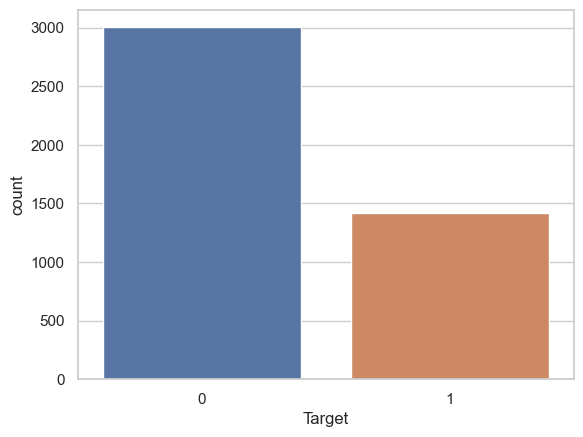

In [13]:
sns.set_theme(style='whitegrid')
sns.countplot(x=df['Target'])
print('Với Graduate:0, Dropout:1, Enrolled:0')
print(df['Target'].value_counts())

In [14]:
#Tách data thành 2 phần, một phần chứa thuộc tính binh thuong và một phần chứa thuộc tính quyết định)
X = df.drop('Target', axis = 1)
y = df['Target'].values.reshape(-1,1)
#Xác định dữ liệu không phải dạng số để phù hợp cho đầu vào thư viện
X.select_dtypes(exclude = ['int64','float64']).columns
print(X.shape)
print(y.shape)

(4423, 30)
(4423, 1)


In [15]:
from sklearn.model_selection import train_test_split
#Train 80%, Test 20%
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2)

In [16]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, np.ravel(y_train,order='C'))
start_time = time.time()

In [17]:
y_pred = rf.predict(X_test)

Thời gian chạy thuật toán
0.13005757331848145


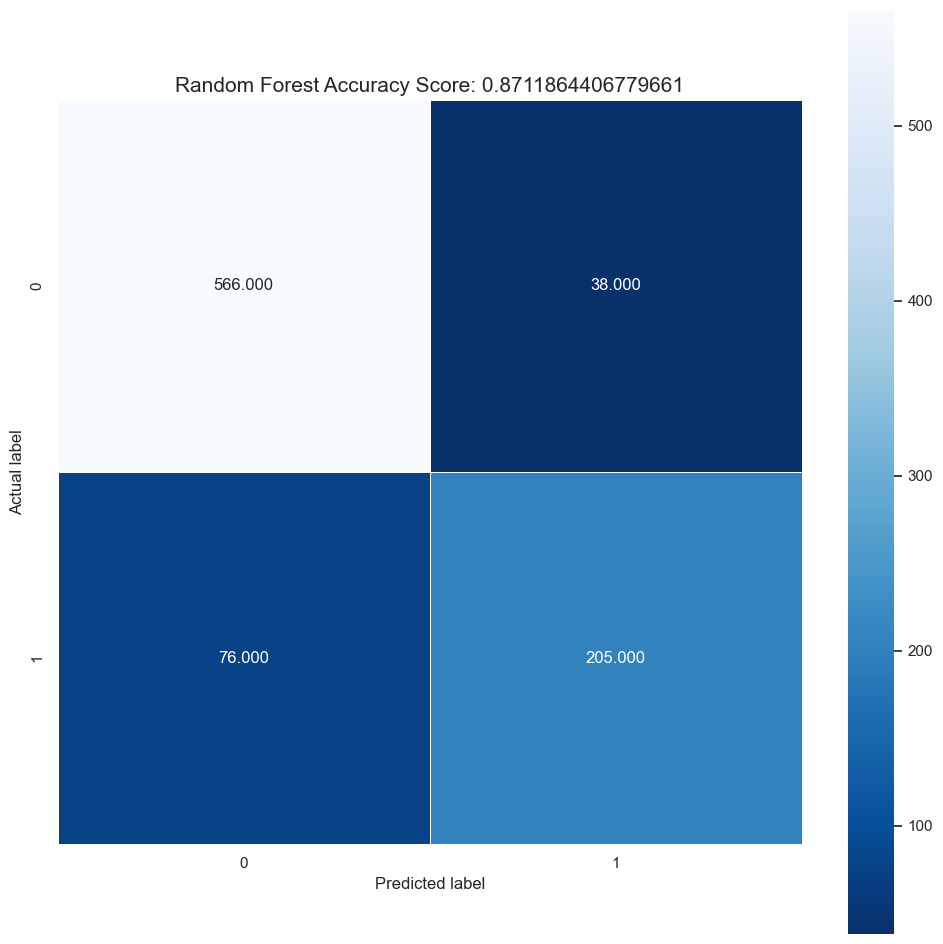

In [18]:
cm = confusion_matrix(y_test, y_pred)
tree_score1 = metrics.accuracy_score(y_test, y_pred)
#Biểu diễn ra dạng đồ thị
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap= 'Blues_r');
plt.ylabel("Actual label")
plt.xlabel("Predicted label");
title = "Random Forest Accuracy Score: {0}".format(tree_score1)
plt.title(title, size = 15)
end_time = time.time()
print('Thời gian chạy thuật toán')
t5 = end_time - start_time
print (t5)

Text(0.5, 0, 'Random Forest Feature Importance')

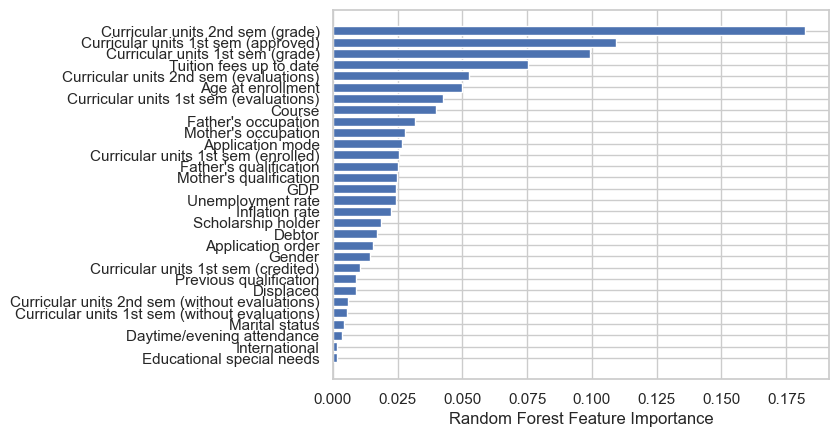

In [19]:
#Tìm ra các nhân tố quan trọng
sorted_idx = rf.feature_importances_.argsort()
plt.barh(df.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [20]:
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

accuracy = metrics.accuracy_score(y_test, y_pred)
print('Thời gian chạy thuật toán là ', t5 )
print ('Accuracy:',accuracy)
print ('Report:', metrics.classification_report(y_test, y_pred))


Thời gian chạy thuật toán là  0.13005757331848145
Accuracy: 0.8711864406779661
Report:               precision    recall  f1-score   support

           0       0.88      0.94      0.91       604
           1       0.84      0.73      0.78       281

    accuracy                           0.87       885
   macro avg       0.86      0.83      0.85       885
weighted avg       0.87      0.87      0.87       885



In [21]:
#Naive Bayes
start_time = time.time()
gnb = GaussianNB()
bayes_pred = gnb.fit(X_train, np.ravel(y_train,order='C')).predict(X_test)

Text(0.5, 1.0, 'Naive Bayes Accuracy Score: 0.8112994350282486')

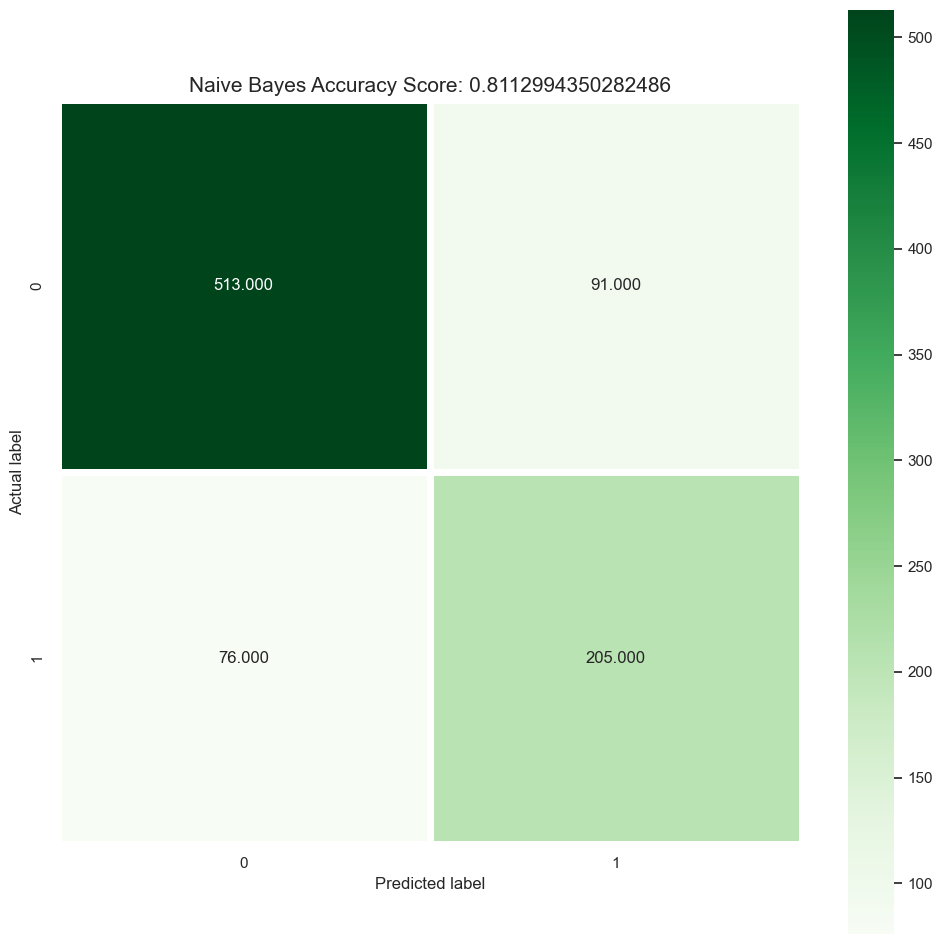

In [22]:
bayes_cm = metrics.confusion_matrix(y_test, bayes_pred)
bayes_score = metrics.accuracy_score(y_test, bayes_pred)
plt.figure(figsize = (12,12))
sns.heatmap(bayes_cm, annot = True, fmt=".3f", linewidths = 5, square = True, cmap = "Greens");
plt.ylabel("Actual label")
plt.xlabel("Predicted label");
title = "Naive Bayes Accuracy Score: {0}".format(bayes_score)
plt.title(title, size = 15)


In [23]:
#Tính độ chính xác
p3 = metrics.accuracy_score(y_test, bayes_pred)
end_time = time.time()
t3 = end_time - start_time
print('Thời gian chạy thuật toán là ', t3 )
print("Accuracy: ", p3)
print("Report: ", metrics.classification_report(y_test, bayes_pred))

Thời gian chạy thuật toán là  0.2198472023010254
Accuracy:  0.8112994350282486
Report:                precision    recall  f1-score   support

           0       0.87      0.85      0.86       604
           1       0.69      0.73      0.71       281

    accuracy                           0.81       885
   macro avg       0.78      0.79      0.79       885
weighted avg       0.81      0.81      0.81       885

